In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.table import Table
from scipy.optimize import curve_fit

from scipy.stats import binned_statistic_2d

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'

In [3]:
#  MIST isochrones
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = '../iso/mist/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
#MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.) & 
                    (mist['Gaia_G_DR2Rev'] > 2))[0][::-1]
mist_ms2 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] > 8.11) & (mist['log10_isochrone_age_yr'] < 8.2))[0][::-1]

In [4]:
def MM09e2(B_V, age):
    ''' 
    Eqn 2 
    http://adsabs.harvard.edu/abs/2009ApJ...695..679M
    '''
    a = 0.50
    b = 0.15
    P = np.sqrt(age) * (np.sqrt(B_V - a)) - b * (B_V - a)
    return P

def MM09e3(B_V, age):
    ''' Eqn 3 '''
    c = 0.77
    d = 0.40
    f = 0.60
    P = age**0.52 * (c * (B_V - d)**f)
    return P

In [5]:
mist['Bessell_B'].values[np.where((mist['star_mass'] == mist['star_mass'].values[0]))]

array([12.323118])

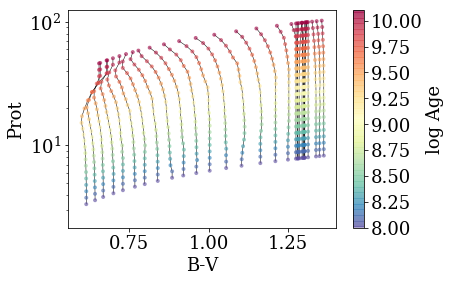

In [6]:
arng = np.where((mist['log10_isochrone_age_yr'] > 8) & 
                (mist['log10_isochrone_age_yr'] <= 10.2) & 
                (mist['star_mass'] > 0.25) & 
                (mist['star_mass'] <= 1.2) & 
                (mist['phase'] == 0))[0]


# step over all the masses (from 0.3 - 1.2)
masses = np.arange(0.25, 1.5, 0.03)
ages_do = 10.**np.arange(2, 4.2, 0.1)
for mm in masses:
    mok = np.where((np.abs(mist['star_mass'].values[arng] - mm) < 0.002))[0]
    
    ages_all = 10.**mist['log10_isochrone_age_yr'].values[arng][mok] / 1e6
    colors_all = mist['Bessell_B'].values[arng][mok] - mist['Bessell_V'].values[arng][mok]
    
    if (np.size(mok) > 2):
        colors_do = np.interp(ages_do, ages_all, colors_all)    
        Prots = MM09e3(colors_do, ages_do)
        plt.plot(colors_do, Prots, lw=0.5, c='k', zorder=0)
        plt.scatter(colors_do, Prots, alpha=0.5, c=np.log10(ages_do)+6, 
                    cmap=plt.cm.Spectral_r, marker='.')

cbar = plt.colorbar()
cbar.set_label('log Age')
plt.xlabel('B-V')
plt.ylabel('Prot')
plt.yscale('log')

In [7]:
10.**mist['log10_isochrone_age_yr'].values[arng][mok] / 1e6

array([], dtype=float64)

In [8]:
mok = np.where((np.abs(mist['star_mass'].values[arng]- 0.7) < 0.001))[0]

ages_all = 10.**mist['log10_isochrone_age_yr'].values[arng][mok] / 1e6
colors_all = mist['Bessell_B'].values[arng][mok] - mist['Bessell_V'].values[arng][mok]

In [9]:
ages_do = 10.**np.arange(2, 4.2, 0.1)
colors_do = np.interp(ages_do, ages_all, colors_all)


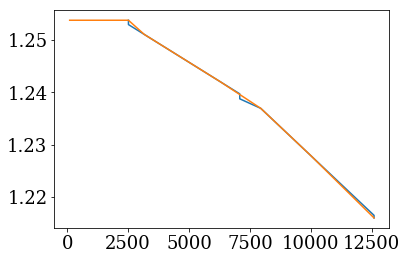

In [10]:
plt.plot(ages_all, colors_all)
plt.plot(ages_do, colors_do)

In [11]:
mist['star_mass'].values[arng][mok] - 0.7

array([-6.13907496e-04, -3.98653556e-04, -1.83651160e-04,  1.00287447e-04,
       -4.07626687e-04, -1.92278562e-04,  2.72935266e-05,  2.58457204e-04,
       -5.59122445e-04,  5.16463456e-04,  7.83857692e-04])